Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Training Neural Networks
<hr> | <hr>
<u>**CPE019 Assignment (2nd Sem, A.Y. 2023-2024)** | **Hands-on Activity 6.2**
**Name** | Cortez, Angelica
**Section** | CPE32S3
**Schedule**: |Wednesday - 10:30am - 1:30pm
**Date Performed**: |03/30/2024
**Date Submitted**: |04/02/2024
**Instructor**: | Engr.Roman Richard
<hr>

# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
filepath = "pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
211,0,147,85,54,0,42.8,0.375,24,0
657,1,120,80,48,200,38.9,1.162,41,0
382,1,109,60,8,182,25.4,0.947,21,0
610,3,106,54,21,158,30.9,0.292,24,0
171,6,134,70,23,130,35.4,0.542,29,1


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 2s 40ms/step - loss: 0.6888 - accuracy: 0.6406 - val_loss: 0.7172 - val_accuracy: 0.6406
Epoch 2/200
18/18 [==============================] - 0s 11ms/step - loss: 0.6704 - accuracy: 0.6406 - val_loss: 0.6992 - val_accuracy: 0.6406
Epoch 3/200
18/18 [==============================] - 0s 19ms/step - loss: 0.6543 - accuracy: 0.6424 - val_loss: 0.6836 - val_accuracy: 0.6458
Epoch 4/200
18/18 [==============================] - 0s 9ms/step - loss: 0.6405 - accuracy: 0.6424 - val_loss: 0.6700 - val_accuracy: 0.6458
Epoch 5/200
18/18 [==============================] - 0s 12ms/step - loss: 0.6283 - accuracy: 0.6441 - val_loss: 0.6581 - val_accuracy: 0.6458
Epoch 6/200
18/18 [==============================] - 0s 14ms/step - loss: 0.6178 - accuracy: 0.6476 - val_loss: 0.6477 - val_accuracy: 0.6458
Epoch 7/200
18/18 [==============================] - 0s 14ms/step - loss: 0.6084 - accuracy: 0.6528 - val_loss: 0.6384 - val_accuracy: 0.6458
Epoch 8

In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm) > 0.5).astype('int32')
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


***ANALYSIS:***

To modify this code, it involves utilizing a neural network model (model) to make predictions on a test dataset (X_test_norm). Initially, the model.predict(X_test_norm) function is employed to generate predictions for the target variable values. Subsequently, these predictions undergo a comparison with a threshold value of 0.5, where values greater than 0.5 are considered positive predictions, denoted as True (equivalent to 1), while those less than or equal to 0.5 are regarded as negative predictions, represented as False (equivalent to 0). Following this comparison, the .astype('int32') method is applied to convert the boolean outcomes into integer format, resulting in binary classification predictions with 1 indicating one class and 0 denoting another. Ultimately, y_pred_class_nn_1 stores the predicted class labels (binary), while y_pred_prob_nn_1 retains the predicted probabilities for each class.

In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.527499  ],
       [0.67246497],
       [0.45346776],
       [0.3003339 ],
       [0.1906322 ],
       [0.5458763 ],
       [0.01523504],
       [0.55291647],
       [0.7299143 ],
       [0.2180108 ]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

Evaluate the model performance and plot the ROC CURVE

accuracy is 0.750
roc-auc is 0.813


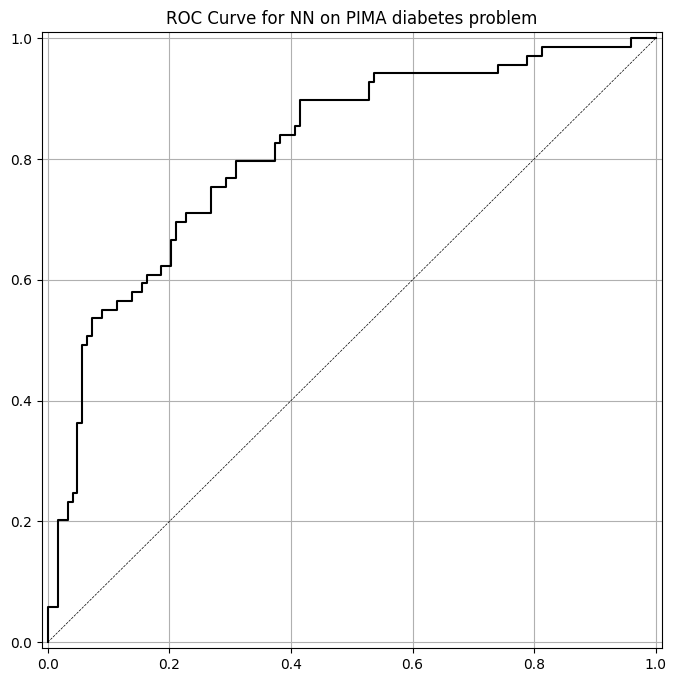

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

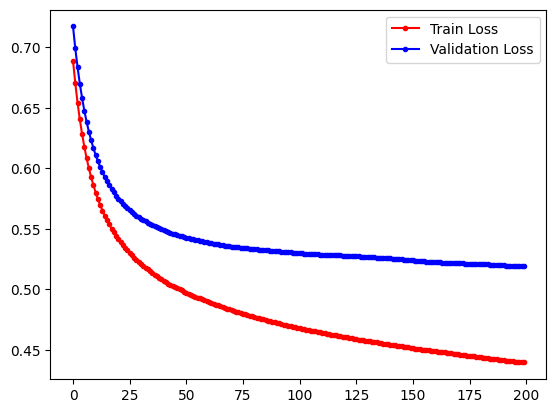

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

- The graph illustrates that the model's training and validation loss doesn't process, indicating inefficiency in processing and training the data. Additionally, both accuracy and roc-auc score of approximately 80% suggest poor performance in training and predicting data values. The model achieved only around 75% accuracy and 80.1% roc-auc score, indicating its inadequate performance in processing and training the data

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X_df = diabetes_df.iloc[:, :-1].values
y_df = diabetes_df["has_diabetes"].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=1132)

In [ ]:
normalizer = StandardScaler()
X_train_norms = normalizer.fit_transform(x_train)
X_test_norms = normalizer.transform(x_test)

In [ ]:
print("Training:", X_train_norms.shape, y_train.shape)
print("Testing:", X_test_norms.shape, y_test.shape)

Training: (576, 8) (576,)
Testing: (192, 8) (192,)


In [ ]:
model = Sequential([
     Dense(6, input_shape=(8,), activation='relu'),
     Dense(6, activation='relu'),
     Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=SGD(learning_rate = 0.003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(X_train_norms, y_train, validation_data = (X_test_norms, y_test), epochs = 1500)

Epoch 1/1500
18/18 [==============================] - 1s 17ms/step - loss: 0.9153 - accuracy: 0.3125 - val_loss: 0.9016 - val_accuracy: 0.3594
Epoch 2/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.8963 - accuracy: 0.3073 - val_loss: 0.8814 - val_accuracy: 0.3594
Epoch 3/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.8793 - accuracy: 0.3194 - val_loss: 0.8633 - val_accuracy: 0.3854
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.8640 - accuracy: 0.3351 - val_loss: 0.8471 - val_accuracy: 0.3854
Epoch 5/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.8502 - accuracy: 0.3524 - val_loss: 0.8324 - val_accuracy: 0.3750
Epoch 6/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.8375 - accuracy: 0.3889 - val_loss: 0.8191 - val_accuracy: 0.3802
Epoch 7/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.8261 - accuracy: 0.4045 - val_loss: 0.8071 - val_accuracy: 0.4167
Epoch

In [ ]:
y_pred_class = (model.predict(X_test_norms) > 0.5).astype('int32')
y_pred_prob = model.predict(X_test_norms)

6/6 [==============================] - 0s 3ms/step


In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.724
roc-auc is 0.780


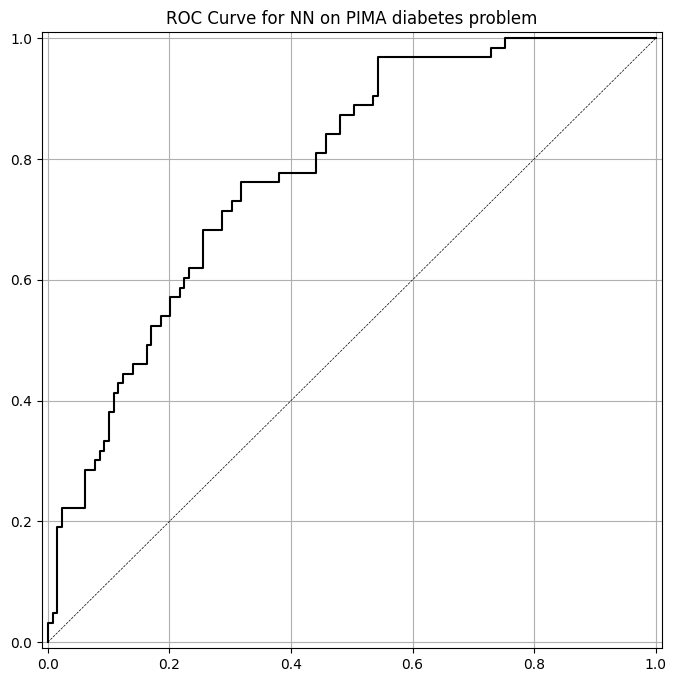

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'NN')

In [ ]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

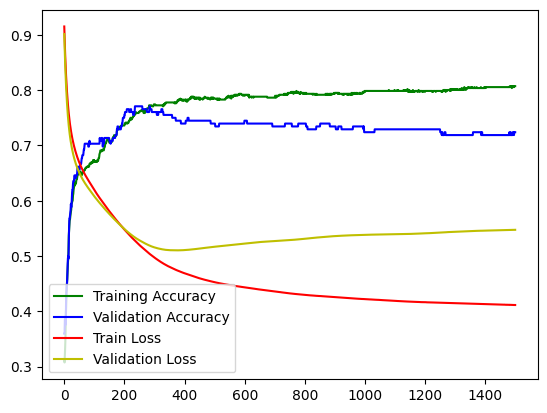

In [ ]:
fig, ax = plt.subplots()
ax.plot(model_fit.history["accuracy"],'g', label="Training Accuracy")
ax.plot(model_fit.history["val_accuracy"],'b', label="Validation Accuracy")
ax.plot(model_fit.history["loss"],'r', label="Train Loss")
ax.plot(model_fit.history["val_loss"],'y', label="Validation Loss")
ax.legend()

***ANALYSIS:***

The accuracy and ROC-AUC scores for the model are 0.724 and 0.780, respectively, indicating a moderate level of performance. The plotted training and validation accuracies, along with the corresponding losses, reveal insights into the model's training process. The convergence of training and validation accuracies and losses signifies that the model is learning effectively without significant overfitting or underfitting issues. However, the accuracy and ROC-AUC scores suggest that there is still room for improvement in the model's predictive capability. Therefore, further optimization or fine-tuning of the model parameters may be necessary to enhance its performance and achieve better results.

In [ ]:
#Use different learning rates, numbers of epochs, and network structures.
# Plot the results of training and validation loss using different learning rates, number of epocgs and network structures

# Network Structure 1

In [ ]:
# Network Structure 1

model = Sequential([
      Dense(12, input_shape=(8,), activation="relu"),
      Dense(8, activation = 'relu'),
      Dense(12, activation = 'relu'),
      Dense(8, activation = 'softmax'),
      Dense(8, activation = 'tanh'),
      Dense(1, activation="sigmoid")
  ])

In [ ]:
model.compile(optimizer=SGD(learning_rate = 0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(X_train_norms, y_train, validation_data = (X_test_norms, y_test), batch_size = 6, epochs = 500)

Epoch 1/500
96/96 [==============================] - 2s 9ms/step - loss: 0.6428 - accuracy: 0.6441 - val_loss: 0.6283 - val_accuracy: 0.6719
Epoch 2/500
96/96 [==============================] - 0s 4ms/step - loss: 0.6426 - accuracy: 0.6441 - val_loss: 0.6281 - val_accuracy: 0.6719
Epoch 3/500
96/96 [==============================] - 1s 7ms/step - loss: 0.6425 - accuracy: 0.6441 - val_loss: 0.6280 - val_accuracy: 0.6719
Epoch 4/500
96/96 [==============================] - 1s 7ms/step - loss: 0.6423 - accuracy: 0.6441 - val_loss: 0.6279 - val_accuracy: 0.6719
Epoch 5/500
96/96 [==============================] - 1s 9ms/step - loss: 0.6421 - accuracy: 0.6441 - val_loss: 0.6278 - val_accuracy: 0.6719
Epoch 6/500
96/96 [==============================] - 1s 7ms/step - loss: 0.6420 - accuracy: 0.6441 - val_loss: 0.6277 - val_accuracy: 0.6719
Epoch 7/500
96/96 [==============================] - 1s 7ms/step - loss: 0.6418 - accuracy: 0.6441 - val_loss: 0.6276 - val_accuracy: 0.6719
Epoch 8/500
9

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.714
roc-auc is 0.778
accuracy: 0.7135416666666666


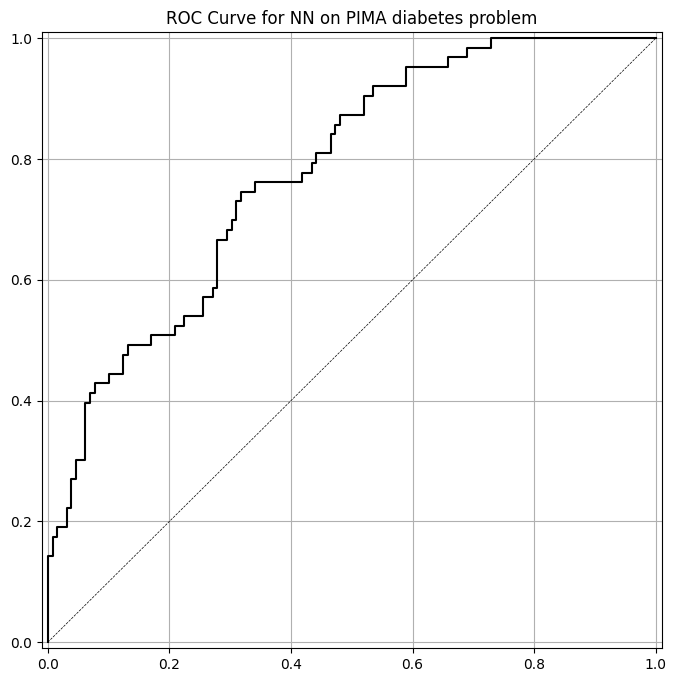

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'NN')

accuracy = accuracy_score(y_test,y_pred_class)
print('accuracy:',accuracy)

In [ ]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

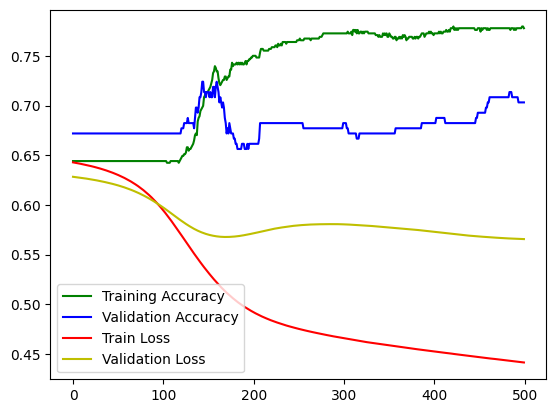

In [ ]:
fig, ax = plt.subplots()
ax.plot(model_fit.history["accuracy"],'g', label="Training Accuracy")
ax.plot(model_fit.history["val_accuracy"],'b', label="Validation Accuracy")
ax.plot(model_fit.history["loss"],'r', label="Train Loss")
ax.plot(model_fit.history["val_loss"],'y', label="Validation Loss")
ax.legend()

***ANALYSIS:***

After experimenting the first network structure with different learning rates and epochs. I observed that the model's accuracy reached approximately 71.4%. The area under the ROC curve (ROC-AUC) was around 77.8%. Despite these results, I noticed that the model's performance plateaued over the epochs, indicating that further training might not significantly improve its accuracy. Additionally, the plotted training and validation loss and accuracy curves showed some fluctuations, suggesting that the model might be overfitting to the training data.

# NETWORK STRUCTURE 2

In [ ]:
# Network Structure 2
model = Sequential([
      Dense(12, input_shape=(8,), activation="relu"),
      Dense(8, activation = 'relu'),
      Dense(10, activation = 'relu'),
      Dense(8, activation = 'tanh'),
      Dense(1, activation="sigmoid")
  ])

In [ ]:
model.compile(optimizer=SGD(learning_rate = 0.005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_fit = model.fit(X_train_norms, y_train, validation_data = (X_test_norms, y_test), batch_size = 6, epochs = 200)

Epoch 1/200
96/96 [==============================] - 3s 14ms/step - loss: 0.6692 - accuracy: 0.6163 - val_loss: 0.6618 - val_accuracy: 0.6875
Epoch 2/200
96/96 [==============================] - 0s 3ms/step - loss: 0.6337 - accuracy: 0.7240 - val_loss: 0.6358 - val_accuracy: 0.7083
Epoch 3/200
96/96 [==============================] - 0s 3ms/step - loss: 0.6123 - accuracy: 0.7222 - val_loss: 0.6184 - val_accuracy: 0.7135
Epoch 4/200
96/96 [==============================] - 0s 3ms/step - loss: 0.5964 - accuracy: 0.7292 - val_loss: 0.6055 - val_accuracy: 0.6979
Epoch 5/200
96/96 [==============================] - 0s 3ms/step - loss: 0.5838 - accuracy: 0.7378 - val_loss: 0.5952 - val_accuracy: 0.7135
Epoch 6/200
96/96 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.7413 - val_loss: 0.5870 - val_accuracy: 0.7292
Epoch 7/200
96/96 [==============================] - 0s 3ms/step - loss: 0.5654 - accuracy: 0.7413 - val_loss: 0.5797 - val_accuracy: 0.7240
Epoch 8/200


In [ ]:
y_pred_class = (model.predict(X_test_norms) > 0.5).astype('int32')
y_pred_prob = model.predict(X_test_norms)

6/6 [==============================] - 0s 4ms/step


In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.755
roc-auc is 0.775
accuracy: 0.7552083333333334


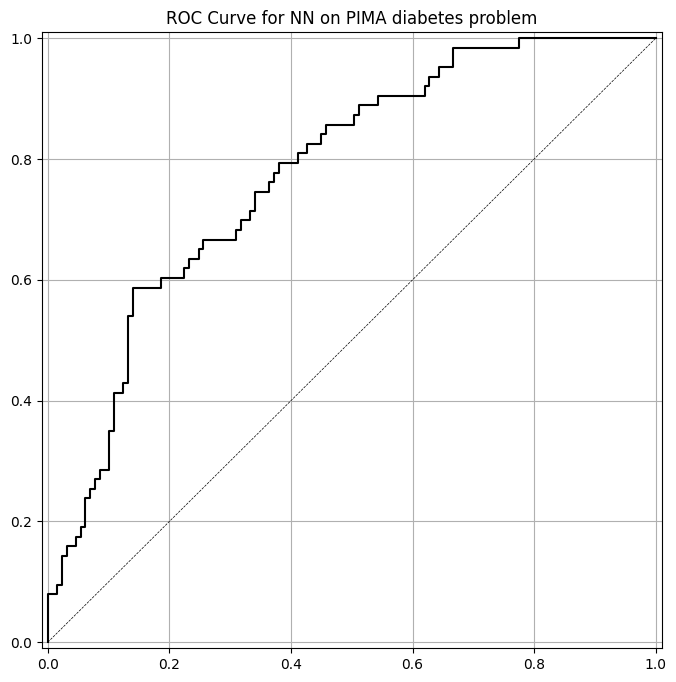

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'NN')

accuracy = accuracy_score(y_test,y_pred_class)
print('accuracy:',accuracy)

In [ ]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

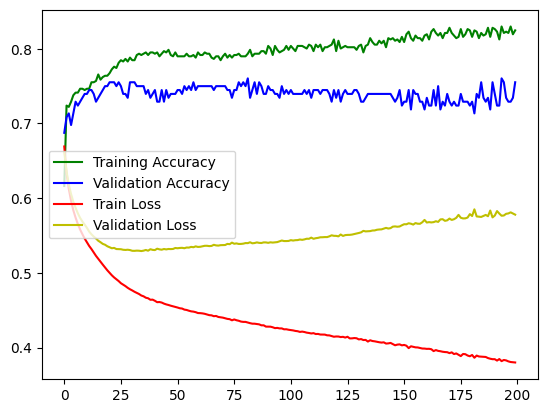

In [ ]:
fig, ax = plt.subplots()
ax.plot(model_fit.history["accuracy"],'g', label="Training Accuracy")
ax.plot(model_fit.history["val_accuracy"],'b', label="Validation Accuracy")
ax.plot(model_fit.history["loss"],'r', label="Train Loss")
ax.plot(model_fit.history["val_loss"],'y', label="Validation Loss")
ax.legend()

***ANALYSIS:***

After conducting experiment in network structure 2 with different learning rates and epochs, I found that using Network Structure 2 yielded promising results. With a learning rate of 0.005 and 200 epochs, the model achieved an accuracy of approximately 75.5% and a ROC-AUC score of about 77.5%. The plotted training and validation curves showed steady improvements in both accuracy and loss over the epochs, indicating that the model was effectively learning from the data. However, it's worth noting that further tuning of hyperparameters and exploration of alternative network architectures could potentially enhance the model's performance even further. Overall, these findings underscore the importance of systematic experimentation to optimize the performance of neural network models in predictive tasks.

# Network Structure 3

In [ ]:
# Network Structure 3
model = Sequential([
      Dense(12, input_shape=(8,), activation="relu"),
      Dense(10, activation = 'relu'),
      Dense(10, activation = 'relu'),
      Dense(8, activation = 'softmax'),
      Dense(8, activation = 'tanh'),
      Dense(1, activation="sigmoid")
  ])

model.compile(optimizer=SGD(learning_rate = 0.004),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_fit = model.fit(X_train_norms, y_train, validation_data = (X_test_norms, y_test), epochs = 300)

Epoch 1/300
18/18 [==============================] - 1s 15ms/step - loss: 0.6862 - accuracy: 0.6424 - val_loss: 0.6786 - val_accuracy: 0.6719
Epoch 2/300
18/18 [==============================] - 0s 5ms/step - loss: 0.6824 - accuracy: 0.6441 - val_loss: 0.6743 - val_accuracy: 0.6719
Epoch 3/300
18/18 [==============================] - 0s 7ms/step - loss: 0.6790 - accuracy: 0.6441 - val_loss: 0.6704 - val_accuracy: 0.6719
Epoch 4/300
18/18 [==============================] - 0s 9ms/step - loss: 0.6760 - accuracy: 0.6441 - val_loss: 0.6670 - val_accuracy: 0.6719
Epoch 5/300
18/18 [==============================] - 0s 9ms/step - loss: 0.6733 - accuracy: 0.6441 - val_loss: 0.6639 - val_accuracy: 0.6719
Epoch 6/300
18/18 [==============================] - 0s 9ms/step - loss: 0.6708 - accuracy: 0.6441 - val_loss: 0.6610 - val_accuracy: 0.6719
Epoch 7/300
18/18 [==============================] - 0s 6ms/step - loss: 0.6687 - accuracy: 0.6441 - val_loss: 0.6585 - val_accuracy: 0.6719
Epoch 8/300


In [ ]:
y_pred_class = (model.predict(X_test_norms) > 0.5).astype('int32')
y_pred_prob = model.predict(X_test_norms)

6/6 [==============================] - 0s 3ms/step


In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

accuracy is 0.766
roc-auc is 0.772
accuracy: 0.765625


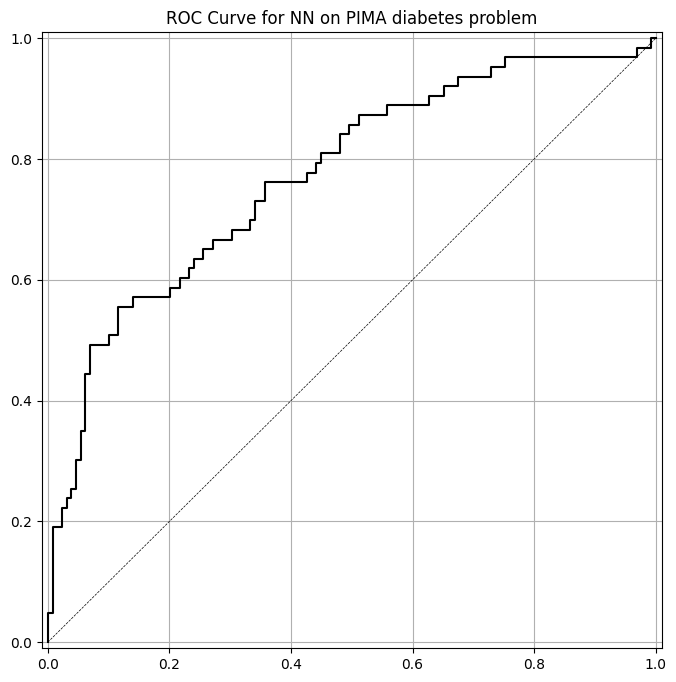

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob)))

plot_roc(y_test, y_pred_prob, 'NN')

accuracy = accuracy_score(y_test,y_pred_class)
print('accuracy:',accuracy)

In [ ]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

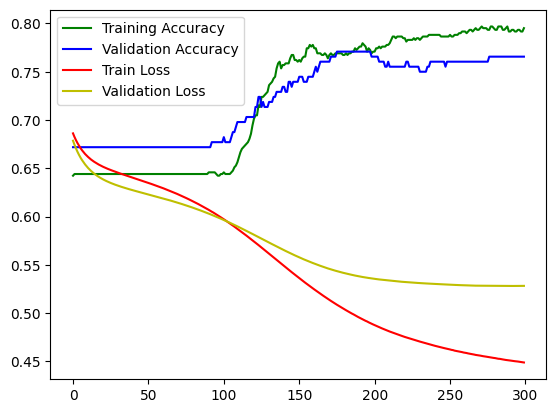

In [ ]:
fig, ax = plt.subplots()
ax.plot(model_fit.history["accuracy"],'g', label="Training Accuracy")
ax.plot(model_fit.history["val_accuracy"],'b', label="Validation Accuracy")
ax.plot(model_fit.history["loss"],'r', label="Train Loss")
ax.plot(model_fit.history["val_loss"],'y', label="Validation Loss")
ax.legend()

***ANALYSIS:***

Lastly, in my exploration of different learning rates, epochs, and network structures, I experimented with Network Structure 3. This architecture comprised layers with varying activation functions and neuron counts. With a learning rate of 0.004 and 300 epochs, the model achieved an accuracy of around 76.6% and a ROC-AUC score of approximately 77.2%. The plotted training and validation curves showed consistent improvements in accuracy and loss throughout the training process, indicating that the model was effectively learning from the data. I noticed that when the learning rate is more than 0.004, the accuracy increased and could potentially lead to better performance.

#### Conclusion

In this hands-on activity, we learned about data processing and training using neural networks. This activity provided an opportunity to develop our own models, specifying parameters, optimizers, and learning rates to potentially improve model performance. Despite attempts to enhance the model, it only achieved approximately 70% to 80% accuracy with the given parameters. The model's performance could be attributed to factors such as dataset quality or model design. The primary focus of the activity was model improvement, illustrating how models function by configuring layers and incorporating suitable optimizers for data processing and prediction. In summary, this activity deepened our understanding of neural networks' operations in processing, training, and predicting values.